In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=['retina']

In [2]:
import cv2

img = cv2.imread("./out2.bmp",cv2.IMREAD_UNCHANGED)

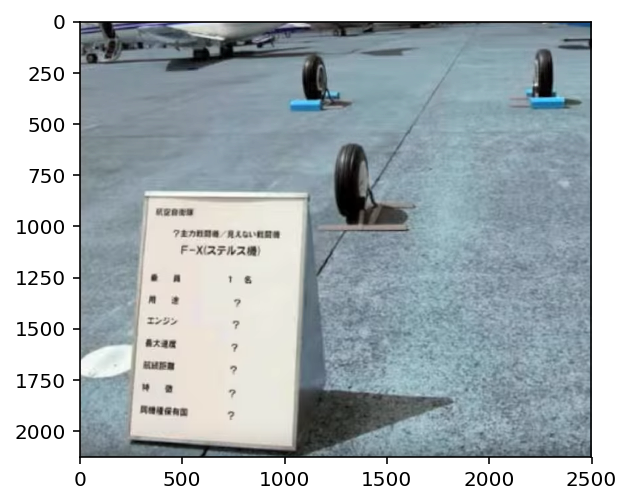

In [6]:
plt.imshow(img)

```c++
unsigned int __cdecl linear_upsample(float *a1, float *a2, signed int ratio, unsigned int size)
{
  float v4; // ST0C_4
  unsigned int result; // eax
  unsigned int j; // [esp+24h] [ebp-14h]
  double scaled; // [esp+28h] [ebp-10h]
  unsigned int i; // [esp+34h] [ebp-4h]

  for ( i = 0; ; ++i )
  {
    result = i;
    if ( i >= size )
      break;
    scaled = 0.0;
    if ( i != size - 1 )
      scaled = (a1[i + 1] - a1[i]) / (long double)ratio;
    for ( j = 0; j < ratio; ++j )
    {
      v4 = a1[i] + (double)j * scaled;
      a2[i * ratio + j] = v4;
    }
  }
  return result;
}

for ( i = 0; i < length; ++i )
  {
    int_1 = (signal[i] + 1.0) / 2.0 - (long double)output + int_1;
    int_2 = int_1 - (long double)output + int_2;
    output = int_2 >= 0.0;
    dst[i] = output;
  }
```

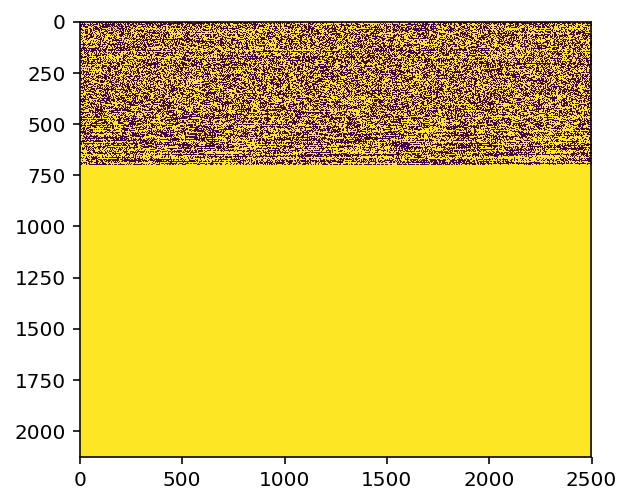

In [4]:
plt.imshow(img[:,:,3])

In [5]:
res = bytearray()

currbyte = 0x00
currbit = 0

for i in range(0,img.shape[0]):
    for j in range(0, img.shape[1]):
        for k in range(0,4):
#             if img[i,j,k]==1:
#                 currbyte = currbyte + (1 << currbit)
#             currbit = currbit + 1
#             if currbit == 8:
#                 currbit = 0
            if img[i,j,k] & 0x01:
                res.append(0x01)
            else:
                res.append(0x00)
#                 currbyte = 0x00
        



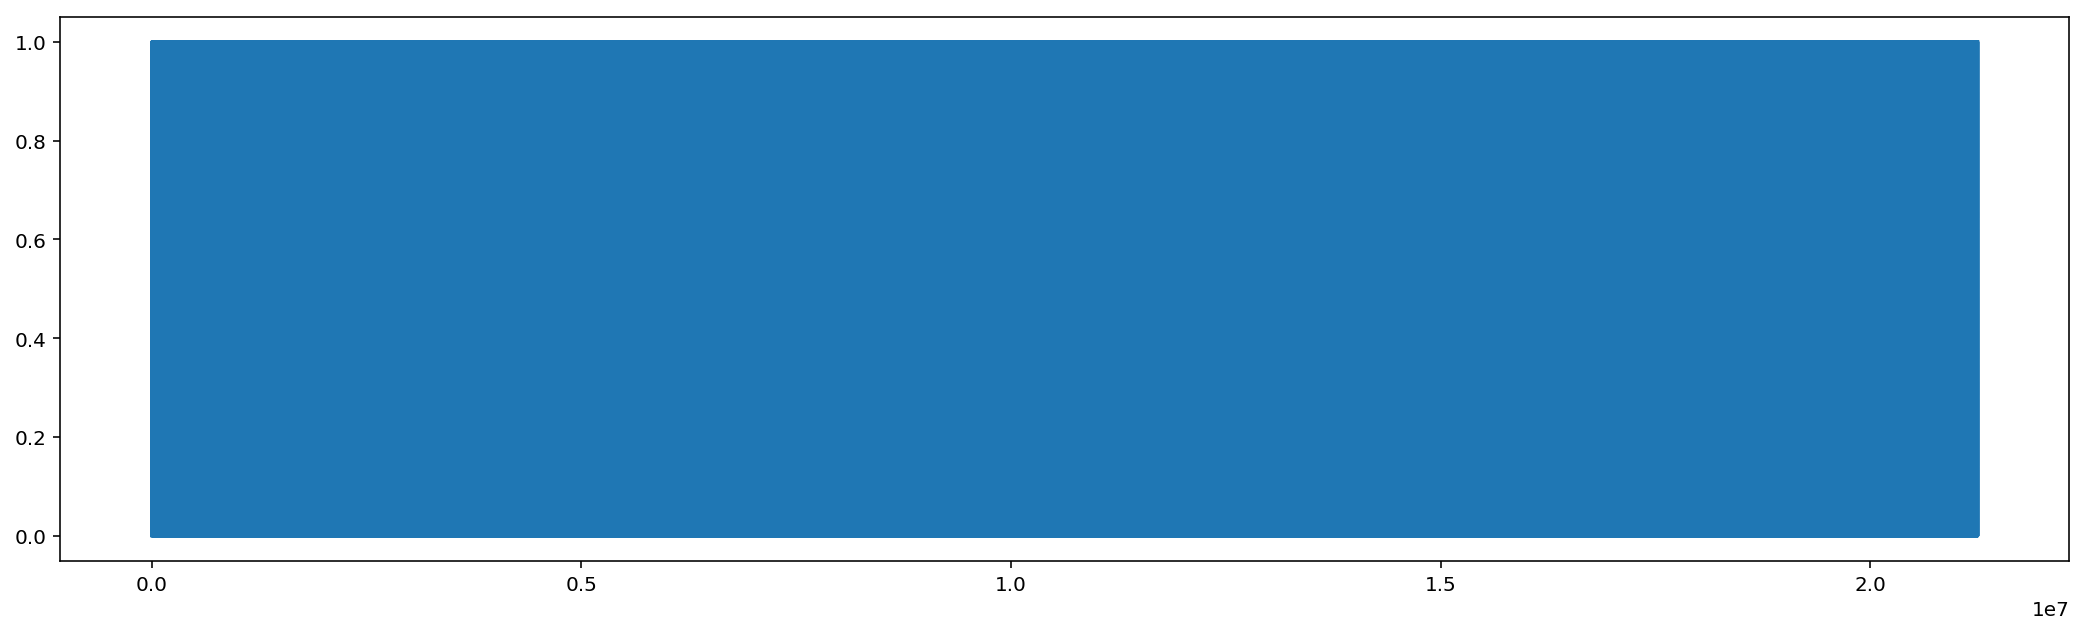

In [114]:
plt.figure(figsize=(18,5))
plt.plot(res)

In [82]:
import scipy.signal
b = scipy.signal.firwin(4096, 0.01)
wav_f = scipy.signal.lfilter(b, 1, res)

/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

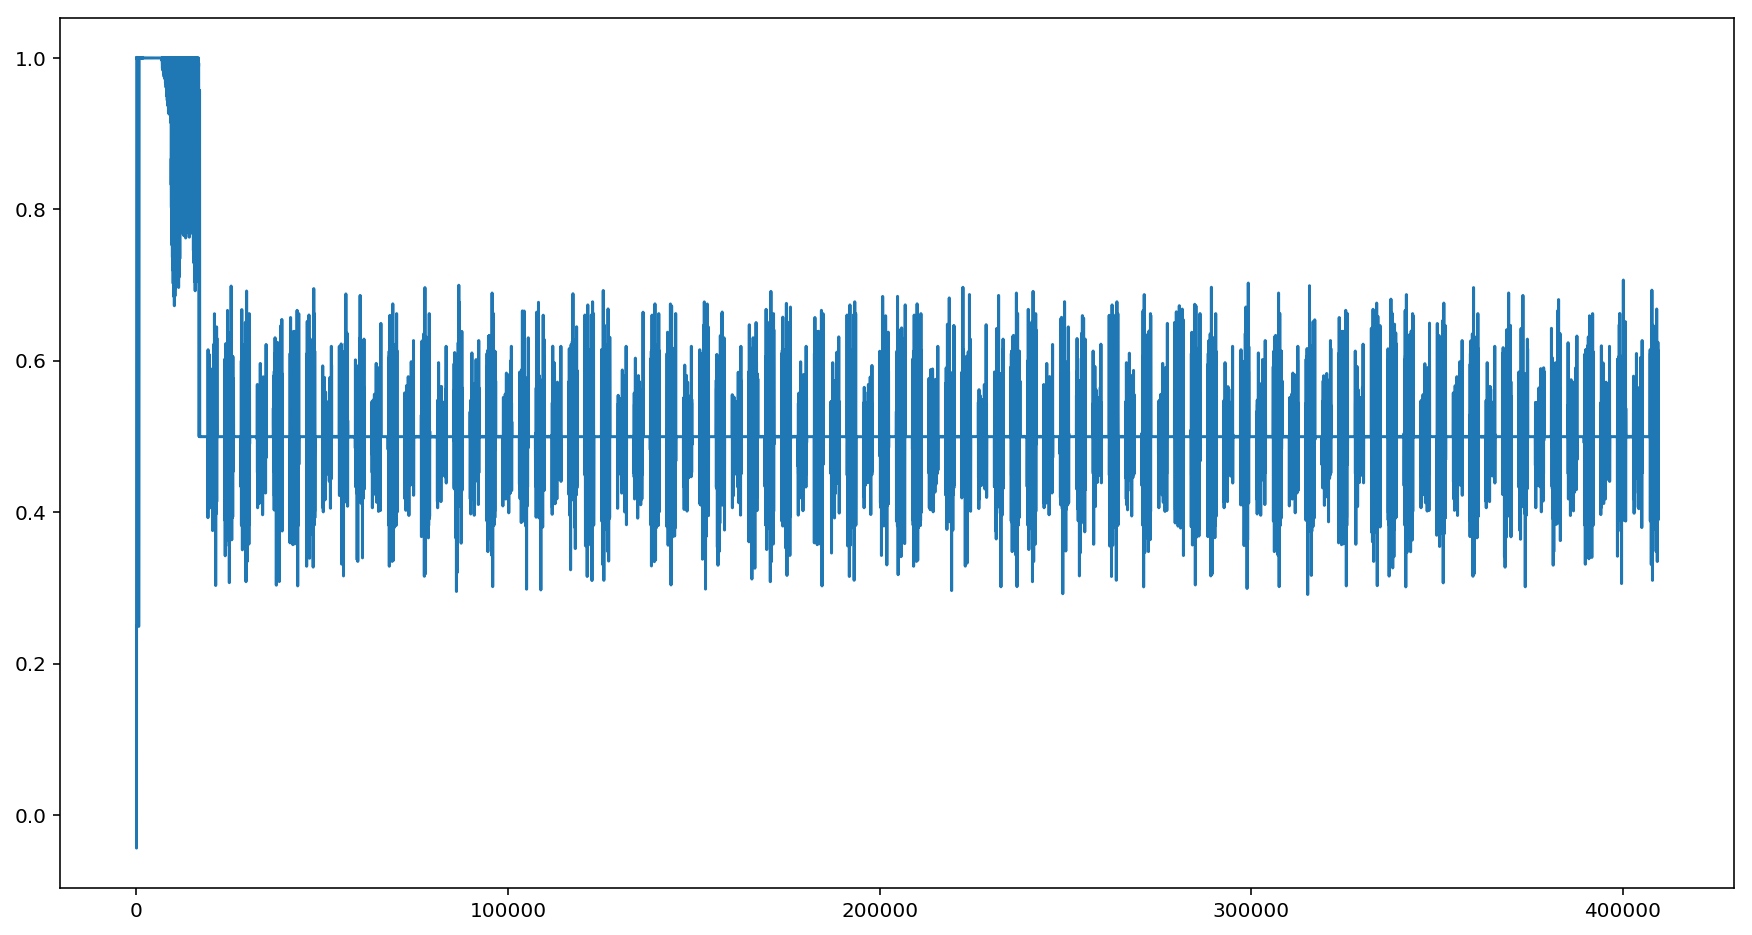

In [74]:
plt.figure(figsize=(15,8))
plt.plot(scipy.signal.resample(wav_f,26214400//64))
scipy.io.wavfile.write("./test_res.wav", 44100, scipy.signal.resample(res,26214400//64))

/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

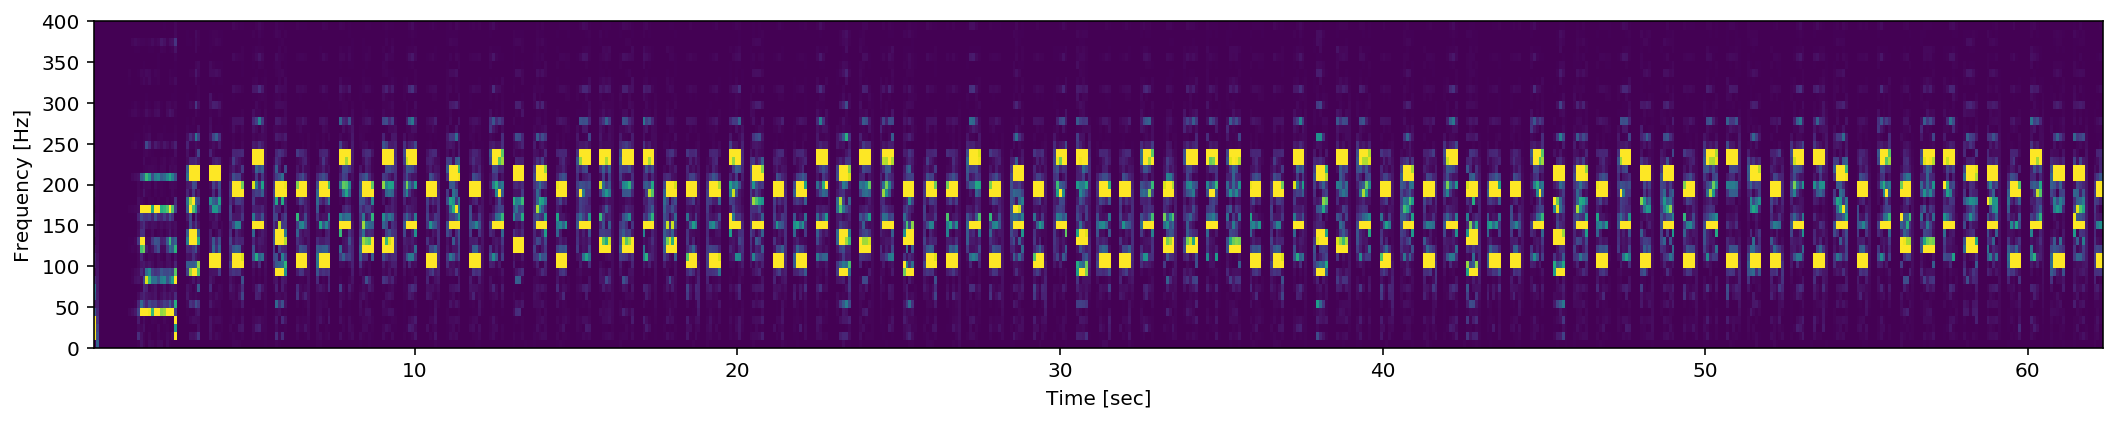

In [109]:
f, t, Sxx = scipy.signal.spectrogram(scipy.signal.resample(res,26214400//42), 10000, nperseg=1024)
plt.figure(figsize=(18,3))
plt.pcolormesh(t, f, Sxx,vmax=0.0005)
plt.ylim(0,400)
#plt.xlim(20,30)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

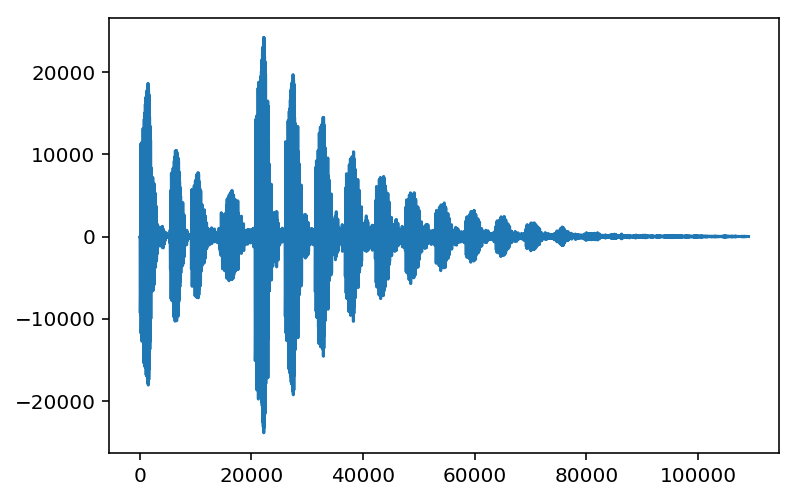

In [12]:
import scipy.io.wavfile
rate,orig=scipy.io.wavfile.read("./mono.wav")
plt.plot(orig)

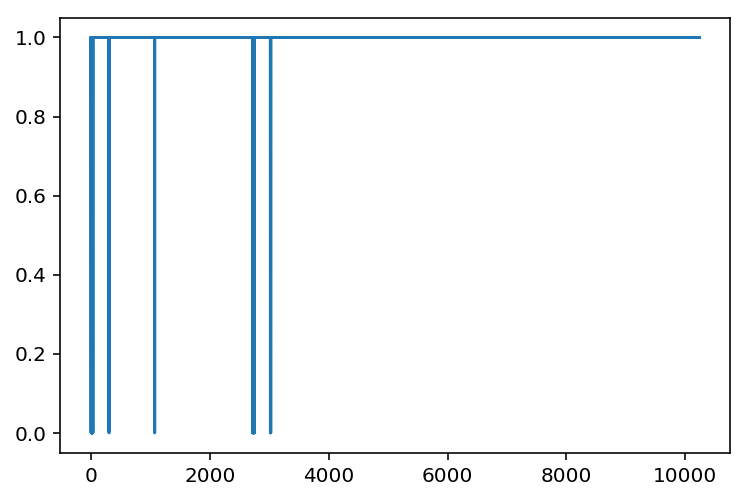

In [55]:
plt.plot(res[431664+10240:431664+10240*2])

In [62]:
data = np.zeros((26214400//4096))
for i in range(0, 26214400//4096):
    for j in range(0,4096):
        data[i]+=res[4096*i+j]

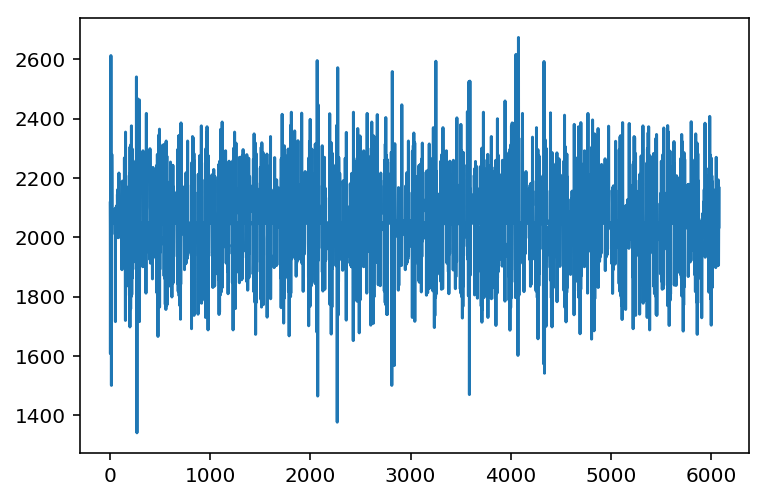

In [71]:
plt.plot(data[320:])
scipy.io.wavfile.write("./test_res.wav", 4410, data[320:]-2000)

In [70]:
img.shape

(2560, 2560, 4)

In [9]:
data = np.fromfile("./out.bmp", dtype=np.uint8)

In [32]:
int.from_bytes(data[2:2+4].tobytes(), byteorder='little')

26214538

In [29]:
data[6:6+4].tobytes().hex()

'00000000'

In [33]:
int.from_bytes(data[10:10+4].tobytes(), byteorder='little')

138

In [34]:
(26214538-138)/4

6553600.0

In [35]:
imagedata = data[138:]
audiodata = imagedata % 2

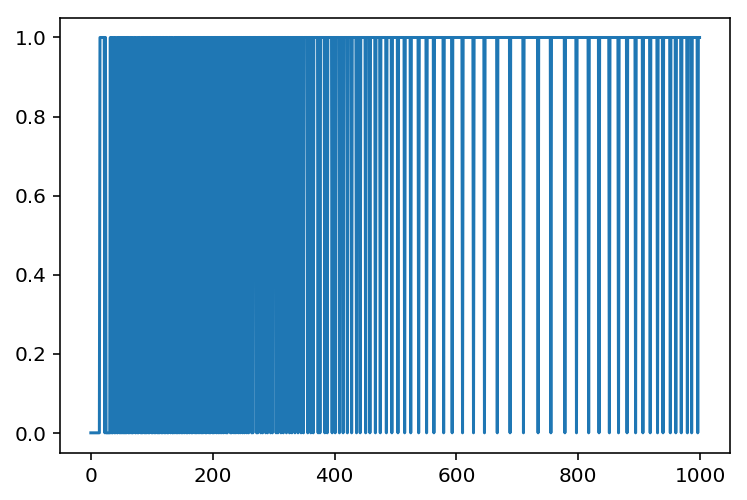

In [36]:
plt.plot(audiodata[0:1000])

In [53]:
import scipy.signal
b = scipy.signal.firwin(4096, 0.1)
wav_f = scipy.signal.lfilter(b, 1, audiodata)

/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


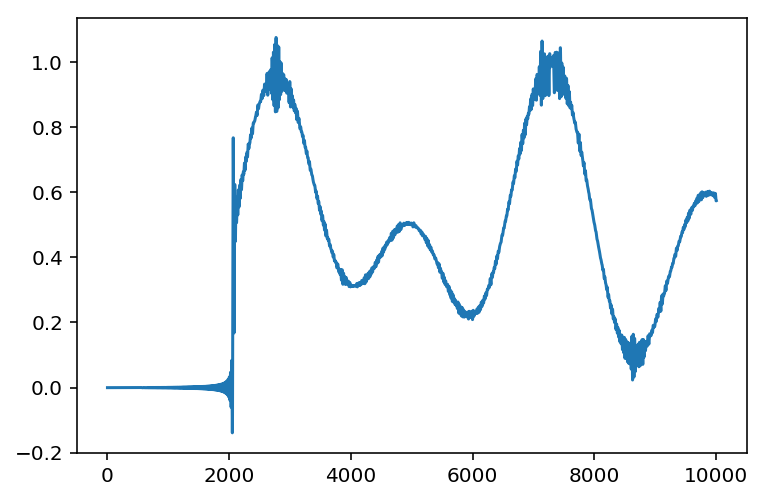

In [54]:
plt.plot(wav_f[0:10000])

In [55]:
wav_down=scipy.signal.resample(wav_f, (26214538-138)//64)

/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/local/lib/python3.7/site-packages/scipy-1.1.0-py3.7-macosx-10.13-x86_64.egg/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

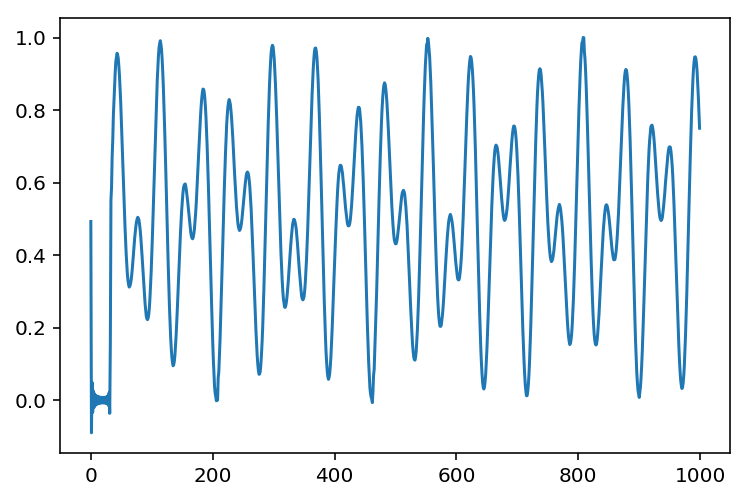

In [56]:
plt.plot(wav_down[0:1000])

In [57]:
import scipy.io.wavfile
scipy.io.wavfile.write("./test_res.wav", 44100, wav_down)